In [48]:
import numpy as np
import pandas as pd
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error

In [2]:
df = pd.read_json('stevens_data_master.json')
df.head()

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),Relative Humidity (%),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month
0,2019-04-30 23:00:00,12.80,33.07,5.962,9.230,13.33,267.0,2019-04-30,54.890,74.06,52.35,None,NaN,NaN,NaN,None,4
1,2019-04-30 22:00:00,12.82,34.52,4.910,11.970,16.22,275.2,2019-04-30,56.090,73.82,44.66,None,NaN,NaN,NaN,None,4
10,2019-04-30 13:00:00,12.67,41.23,0.000,4.946,18.17,292.8,2019-04-30,62.730,73.30,24.97,None,NaN,NaN,NaN,None,4
100,2019-04-26 19:00:00,12.69,34.47,1.052,15.430,41.23,296.0,2019-04-26,67.570,73.60,82.40,None,NaN,NaN,NaN,None,4
1000,2019-03-24 07:00:00,12.74,29.79,5.612,8.280,11.81,274.0,2019-03-24,0.491,90.00,NaN,Stevens Pass,1.0,1.0,1.0,"March 25, 2019",3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21303 entries, 0 to 9999
Data columns (total 17 columns):
Date/Time (PST)             21303 non-null object
Battery Voltage (v)         21296 non-null float64
Temperature (deg F)         21295 non-null float64
Wind Speed Minimum (mph)    21295 non-null float64
Wind Speed Average (mph)    21295 non-null float64
Wind Speed Maximum (mph)    21295 non-null float64
Wind Direction (deg.)       19429 non-null float64
date                        21303 non-null datetime64[ns]
24 Hour Snow (in)           17685 non-null float64
Total Snow Depth (in)       17685 non-null float64
Relative Humidity (%)       178 non-null float64
area                        19682 non-null object
danger_above_treeline       19346 non-null float64
danger_below_treeline       19346 non-null float64
danger_near_treeline        19346 non-null float64
date_tomorrow               19682 non-null object
month                       21303 non-null int64
dtypes: datetime64[ns](1)

### It appears that the relative humidity column is nearly empty (only 178 columns, bummer)

In [4]:
#convert datetime back into datetime format from string
df['Date/Time (PST)'] = pd.to_datetime(df['Date/Time (PST)'])

In [5]:
df.head(1)

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),Relative Humidity (%),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month
0,2019-04-30 23:00:00,12.8,33.07,5.962,9.23,13.33,267.0,2019-04-30,54.89,74.06,52.35,None,NaN,NaN,NaN,None,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21303 entries, 0 to 9999
Data columns (total 17 columns):
Date/Time (PST)             21303 non-null datetime64[ns]
Battery Voltage (v)         21296 non-null float64
Temperature (deg F)         21295 non-null float64
Wind Speed Minimum (mph)    21295 non-null float64
Wind Speed Average (mph)    21295 non-null float64
Wind Speed Maximum (mph)    21295 non-null float64
Wind Direction (deg.)       19429 non-null float64
date                        21303 non-null datetime64[ns]
24 Hour Snow (in)           17685 non-null float64
Total Snow Depth (in)       17685 non-null float64
Relative Humidity (%)       178 non-null float64
area                        19682 non-null object
danger_above_treeline       19346 non-null float64
danger_below_treeline       19346 non-null float64
danger_near_treeline        19346 non-null float64
date_tomorrow               19682 non-null object
month                       21303 non-null int64
dtypes: datetime6

In [7]:
df = df.drop('Relative Humidity (%)',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21303 entries, 0 to 9999
Data columns (total 16 columns):
Date/Time (PST)             21303 non-null datetime64[ns]
Battery Voltage (v)         21296 non-null float64
Temperature (deg F)         21295 non-null float64
Wind Speed Minimum (mph)    21295 non-null float64
Wind Speed Average (mph)    21295 non-null float64
Wind Speed Maximum (mph)    21295 non-null float64
Wind Direction (deg.)       19429 non-null float64
date                        21303 non-null datetime64[ns]
24 Hour Snow (in)           17685 non-null float64
Total Snow Depth (in)       17685 non-null float64
area                        19682 non-null object
danger_above_treeline       19346 non-null float64
danger_below_treeline       19346 non-null float64
danger_near_treeline        19346 non-null float64
date_tomorrow               19682 non-null object
month                       21303 non-null int64
dtypes: datetime64[ns](2), float64(11), int64(1), object(2)
memory

In [9]:
df.describe()

,Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),24 Hour Snow (in),Total Snow Depth (in),danger_above_treeline,danger_below_treeline,danger_near_treeline,month
count,21296.000000,21295.000000,21295.000000,21295.000000,21295.000000,19429.000000,17685.000000,17685.000000,19346.000000,19346.000000,19346.000000,21303.000000
mean,12.543848,26.028648,2.420495,6.437304,12.053108,179.496993,0.018083,91.418860,2.477618,1.954202,2.301458,4.368399
std,2.549749,78.319369,5.125817,6.052230,8.402773,99.822767,91.868543,29.605817,0.780573,0.775944,0.771484,3.969149
min,0.000000,-7999.000000,-7.743000,0.000000,0.000000,0.000000,-7999.000000,-162.700000,1.000000,1.000000,1.000000,1.000000
25%,12.610000,21.580000,0.000000,2.899000,7.212000,86.300000,0.283000,73.360000,2.000000,1.000000,2.000000,2.000000
50%,12.660000,26.780000,0.285000,4.654000,10.000000,241.600000,0.512000,91.600000,2.000000,2.000000,2.000000,3.000000
75%,12.740000,31.870000,2.877000,8.090000,14.250000,270.700000,2.425000,114.000000,3.000000,2.000000,3.000000,4.000000
max,45.980000,68.510000,53.250000,84.900000,71.790000,359.700000,166.300000,220.500000,4.000000,4.000000,4.000000,12.000000


## WHAT DO TO WITH NEGATIVE VALUES?

Temp: set -10 deg F as a cutofff, for it covers all possible temps the cascades can experience with wind chill

Wind Speed min: change all negative values to 0

24 hour snow: this is a hard one, for snow can blow off after a windstorm or melting period/settling. Let's assume that anything over a foot loss in 12 hours is false. This is a naive assumption. 

Total Snow Depth: there are two values less than zero, so i wil just drop those rows

In [10]:
df.shape

(21303, 16)

In [11]:
#wind_index = df.loc[df['Wind Speed Minimum (mph)'] <= 0].index
#change all of these to zeros

df['Wind Speed Minimum (mph)'] = df['Wind Speed Minimum (mph)'].clip(lower=0)

In [12]:
dropped_24snow_index = df.loc[df['24 Hour Snow (in)'] <= -12 ].index
#only losing two rows

df.loc[df['24 Hour Snow (in)'] <= -12 ].shape

(482, 16)

In [13]:
df.shape[0]- df.drop(index=dropped_24snow_index,axis=0).shape[0]

482

In [14]:
df = df.drop(index=dropped_24snow_index,axis=0)

In [15]:
df.shape

(20821, 16)

In [16]:
dropped_totalsnow_index= df.loc[df['Total Snow Depth (in)'] <= 0].index
#only losing two rows


In [17]:
df = df.drop(index=dropped_totalsnow_index,axis=0)

In [18]:
dropped_temp_index = df.loc[df['Temperature (deg F)'] <= -10].index

#-10 Farenheit is cold, so let's use that as a cutoff
#only losing three rows

In [19]:
df = df.drop(index=dropped_temp_index,axis=0)


In [20]:
df.shape

(20816, 16)

In [21]:
df.head(3)

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month
0,2019-04-30 23:00:00,12.80,33.07,5.962,9.230,13.33,267.0,2019-04-30,54.89,74.06,None,NaN,NaN,NaN,None,4
1,2019-04-30 22:00:00,12.82,34.52,4.910,11.970,16.22,275.2,2019-04-30,56.09,73.82,None,NaN,NaN,NaN,None,4
10,2019-04-30 13:00:00,12.67,41.23,0.000,4.946,18.17,292.8,2019-04-30,62.73,73.30,None,NaN,NaN,NaN,None,4


In [22]:
df.describe()

,Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),24 Hour Snow (in),Total Snow Depth (in),danger_above_treeline,danger_below_treeline,danger_near_treeline,month
count,20809.000000,20808.000000,20808.000000,20808.000000,20808.000000,18945.000000,17201.000000,17201.000000,19063.000000,19063.000000,19063.000000,20816.000000
mean,12.539524,26.746334,2.437918,6.423208,12.014106,178.791021,5.478905,91.369089,2.474322,1.950480,2.298956,4.384560
std,2.578988,9.202646,5.172718,6.073320,8.403344,99.929033,16.288344,29.626413,0.780668,0.775005,0.770728,3.997433
min,0.000000,-2.007000,0.000000,0.000000,0.000000,0.000000,-9.820000,1.722000,1.000000,1.000000,1.000000,1.000000
25%,12.610000,21.530000,0.000000,2.887750,7.190000,86.200000,0.294000,73.480000,2.000000,1.000000,2.000000,2.000000
50%,12.660000,26.730000,0.279000,4.625500,10.000000,239.500000,0.520000,91.500000,2.000000,2.000000,2.000000,3.000000
75%,12.740000,31.860000,2.880500,8.042500,14.070000,270.600000,2.527000,113.900000,3.000000,2.000000,3.000000,4.000000
max,45.980000,68.510000,53.250000,84.900000,71.790000,359.700000,166.300000,220.500000,4.000000,4.000000,4.000000,12.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20816 entries, 0 to 9999
Data columns (total 16 columns):
Date/Time (PST)             20816 non-null datetime64[ns]
Battery Voltage (v)         20809 non-null float64
Temperature (deg F)         20808 non-null float64
Wind Speed Minimum (mph)    20808 non-null float64
Wind Speed Average (mph)    20808 non-null float64
Wind Speed Maximum (mph)    20808 non-null float64
Wind Direction (deg.)       18945 non-null float64
date                        20816 non-null datetime64[ns]
24 Hour Snow (in)           17201 non-null float64
Total Snow Depth (in)       17201 non-null float64
area                        19358 non-null object
danger_above_treeline       19063 non-null float64
danger_below_treeline       19063 non-null float64
danger_near_treeline        19063 non-null float64
date_tomorrow               19358 non-null object
month                       20816 non-null int64
dtypes: datetime64[ns](2), float64(11), int64(1), object(2)
memory

In [24]:
df.head(1)

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month
0,2019-04-30 23:00:00,12.8,33.07,5.962,9.23,13.33,267.0,2019-04-30,54.89,74.06,None,NaN,NaN,NaN,None,4


In [25]:
df = df.sort_values(by='Date/Time (PST)',ascending=True)

In [26]:
df['max_24_hour_temp']= df['Temperature (deg F)'].rolling(24).max()
df['min_24_hour_temp']= df['Temperature (deg F)'].rolling(24).min()

In [27]:
df.tail(10)

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month,max_24_hour_temp,min_24_hour_temp
9,2019-04-30 14:00:00,12.66,39.14,0.000,3.424,23.65,292.0,2019-04-30,61.79,73.43,None,NaN,NaN,NaN,None,4,46.16,30.03
8,2019-04-30 15:00:00,12.65,41.20,0.044,7.277,19.29,283.4,2019-04-30,63.00,72.87,None,NaN,NaN,NaN,None,4,46.16,30.03
7,2019-04-30 16:00:00,12.64,38.55,0.482,8.720,19.79,284.7,2019-04-30,61.66,72.85,None,NaN,NaN,NaN,None,4,46.16,30.03
6,2019-04-30 17:00:00,12.64,38.35,0.000,5.536,12.43,278.6,2019-04-30,59.24,73.22,None,NaN,NaN,NaN,None,4,46.16,30.03
5,2019-04-30 18:00:00,13.52,38.46,0.000,8.700,21.96,287.2,2019-04-30,60.25,73.48,None,NaN,NaN,NaN,None,4,46.16,30.03
4,2019-04-30 19:00:00,13.58,37.24,0.088,9.150,20.58,283.8,2019-04-30,58.71,73.74,None,NaN,NaN,NaN,None,4,46.16,30.03
3,2019-04-30 20:00:00,12.93,36.32,5.283,12.320,16.57,276.0,2019-04-30,57.70,73.84,None,NaN,NaN,NaN,None,4,46.16,30.12
2,2019-04-30 21:00:00,12.85,35.28,8.180,12.700,17.65,274.7,2019-04-30,57.03,73.71,None,NaN,NaN,NaN,None,4,46.16,30.67
1,2019-04-30 22:00:00,12.82,34.52,4.910,11.970,16.22,275.2,2019-04-30,56.09,73.82,None,NaN,NaN,NaN,None,4,46.16,30.67
0,2019-04-30 23:00:00,12.80,33.07,5.962,9.230,13.33,267.0,2019-04-30,54.89,74.06,None,NaN,NaN,NaN,None,4,46.16,30.67


In [28]:
df['max_48_hour_temp']= df['Temperature (deg F)'].rolling(24).max()
df['min_48_hour_temp']= df['Temperature (deg F)'].rolling(24).min()

In [29]:
df.iloc[[50]]

,Date/Time (PST),Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),date,24 Hour Snow (in),Total Snow Depth (in),area,danger_above_treeline,danger_below_treeline,danger_near_treeline,date_tomorrow,month,max_24_hour_temp,min_24_hour_temp,max_48_hour_temp,min_48_hour_temp
21252,2014-12-19 15:00:00,13.13,28.66,0.005,0.573,10.0,NaN,2014-12-19,NaN,NaN,Stevens Pass,3.0,2.0,2.0,"December 20, 2014",12,29.5,23.61,29.5,23.61


In [30]:
df.columns

Index(['Date/Time (PST)', 'Battery Voltage (v)', 'Temperature (deg F)',
       'Wind Speed Minimum (mph)', 'Wind Speed Average (mph)',
       'Wind Speed Maximum (mph)', 'Wind Direction (deg.)', 'date',
       '24 Hour Snow (in)', 'Total Snow Depth (in)', 'area',
       'danger_above_treeline', 'danger_below_treeline',
       'danger_near_treeline', 'date_tomorrow', 'month', 'max_24_hour_temp',
       'min_24_hour_temp', 'max_48_hour_temp', 'min_48_hour_temp'],
      dtype='object')

In [31]:
df.isna().sum()

Date/Time (PST)                0
Battery Voltage (v)            7
Temperature (deg F)            8
Wind Speed Minimum (mph)       8
Wind Speed Average (mph)       8
Wind Speed Maximum (mph)       8
Wind Direction (deg.)       1871
date                           0
24 Hour Snow (in)           3615
Total Snow Depth (in)       3615
area                        1458
danger_above_treeline       1753
danger_below_treeline       1753
danger_near_treeline        1753
date_tomorrow               1458
month                          0
max_24_hour_temp             215
min_24_hour_temp             215
max_48_hour_temp             215
min_48_hour_temp             215
dtype: int64

In [32]:
no_avy_index = df.loc[df['danger_above_treeline'].isna()].index
df = df.drop(index=no_avy_index,axis=0)

In [33]:
df.isna().sum()

#wind direction and 23 hour snow depth must also be removed


Date/Time (PST)                0
Battery Voltage (v)            5
Temperature (deg F)            6
Wind Speed Minimum (mph)       6
Wind Speed Average (mph)       6
Wind Speed Maximum (mph)       6
Wind Direction (deg.)       1835
date                           0
24 Hour Snow (in)           3217
Total Snow Depth (in)       3217
area                           0
danger_above_treeline          0
danger_below_treeline          0
danger_near_treeline           0
date_tomorrow                  0
month                          0
max_24_hour_temp             159
min_24_hour_temp             159
max_48_hour_temp             159
min_48_hour_temp             159
dtype: int64

In [34]:
no_snow_depth = df.loc[df['Total Snow Depth (in)'].isna()].index

In [35]:
df.loc[df['Total Snow Depth (in)'].isna()].shape[0]

3217

In [36]:
df.shape[0] - df.drop(index=no_snow_depth).shape[0]

3217

In [37]:
df = df.drop(index=no_snow_depth)

In [38]:
df.isna().sum()


Date/Time (PST)               0
Battery Voltage (v)           0
Temperature (deg F)           1
Wind Speed Minimum (mph)      1
Wind Speed Average (mph)      1
Wind Speed Maximum (mph)      1
Wind Direction (deg.)         1
date                          0
24 Hour Snow (in)             0
Total Snow Depth (in)         0
area                          0
danger_above_treeline         0
danger_below_treeline         0
danger_near_treeline          0
date_tomorrow                 0
month                         0
max_24_hour_temp            154
min_24_hour_temp            154
max_48_hour_temp            154
min_48_hour_temp            154
dtype: int64

In [39]:
df_clean = df.dropna()

## Now, what do i want my X's to be?? 

X: temp, wind speed average, 24 hour snow (in), max/min 24 and 48 H temp 

Y: danger_near_treeline

In [40]:
df_clean = df_clean.reset_index(drop=True)

In [41]:
df_clean.columns

Index(['Date/Time (PST)', 'Battery Voltage (v)', 'Temperature (deg F)',
       'Wind Speed Minimum (mph)', 'Wind Speed Average (mph)',
       'Wind Speed Maximum (mph)', 'Wind Direction (deg.)', 'date',
       '24 Hour Snow (in)', 'Total Snow Depth (in)', 'area',
       'danger_above_treeline', 'danger_below_treeline',
       'danger_near_treeline', 'date_tomorrow', 'month', 'max_24_hour_temp',
       'min_24_hour_temp', 'max_48_hour_temp', 'min_48_hour_temp'],
      dtype='object')

In [42]:
df_clean.shape[0]*.80


12553.6

In [43]:
X = df_clean[[
        'Battery Voltage (v)',
        'Temperature (deg F)',
        'Wind Speed Minimum (mph)', 
        'Wind Speed Average (mph)',
        'Wind Speed Maximum (mph)', 
        '24 Hour Snow (in)',
        'Total Snow Depth (in)',
        'max_24_hour_temp', 'min_24_hour_temp',
        'max_48_hour_temp', 'min_48_hour_temp']]

y = df_clean['danger_near_treeline']

In [44]:
X_train, X_test, y_train, y_test = X[:12553], X[12553:], y[:12553], y[12553:]

DO A CHRONOLIGCAL SPLIT, because its a time series problem


In [45]:
X_train.isna().sum()

Battery Voltage (v)         0
Temperature (deg F)         0
Wind Speed Minimum (mph)    0
Wind Speed Average (mph)    0
Wind Speed Maximum (mph)    0
24 Hour Snow (in)           0
Total Snow Depth (in)       0
max_24_hour_temp            0
min_24_hour_temp            0
max_48_hour_temp            0
min_48_hour_temp            0
dtype: int64

In [46]:
ss = StandardScaler()

In [49]:
mapper = DataFrameMapper([
    (['Temperature (deg F)', 
        'Wind Speed Average (mph)',
        'Wind Speed Maximum (mph)', 
        '24 Hour Snow (in)',
        'Total Snow Depth (in)',
        'max_24_hour_temp', 'min_24_hour_temp',
        'max_48_hour_temp', 'min_48_hour_temp'], ss)
    ])

In [58]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
gbr = GradientBoostingRegressor(n_estimators=100)
knnr = KNeighborsRegressor()
xgbr = XGBRegressor(objective='reg:squarederror')
xgbrfr = XGBRFRegressor(objective='reg:squarederror')
regressors = [lr, rfr, gbr, knnr, xgbr,xgbrfr ]

In [59]:
reg_names = ['LinearRegression',
             'RandomForestRegressor',
             'GradientBoostingRegressor',
             'KNeighborsRegressor',
             'XGBRegressor',
             'XGBRFRegressor'
            ]

In [60]:
baseline_pred = np.mean(y_train)
residuals = (y_test - baseline_pred)
median_absolute_error = np.median(np.abs(residuals))
rmse=np.sqrt(np.mean(residuals**2))

print(median_absolute_error,rmse)

print(f'The MAE of just predicting the mean'
          f' is: {median_absolute_error}\n'
          f'The RMSE just predicting the mean'
          f' is: {rmse}\n'
      '==================================================================\n'
          '========================\n')

for regressor,name in zip(regressors,reg_names): #zip returns a tuple for each pair it is given
    pipe = Pipeline(steps=[
        ('scaler',mapper),
        ('regressor', regressor)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(f'The MAE of the {name}'
          f' is: {mean_absolute_error((y_test),preds)}\n'
          f'The RMSE of the {name}'
          f' is: {mean_squared_error((y_test),preds)}\n'
          '==================================================================\n'
          '========================\n'
         )
    


0.5528558910220664 0.8704630100921337
The MAE of just predicting the mean is: 0.5528558910220664
The RMSE just predicting the mean is: 0.8704630100921337

The MAE of the LinearRegression is: 0.721349558499491
The RMSE of the LinearRegression is: 0.6985482364779043

The MAE of the RandomForestRegressor is: 0.7433356958870658
The RMSE of the RandomForestRegressor is: 0.7820797374808532

The MAE of the GradientBoostingRegressor is: 0.6905870858669245
The RMSE of the GradientBoostingRegressor is: 0.6658530381827482

The MAE of the KNeighborsRegressor is: 0.751322077094616
The RMSE of the KNeighborsRegressor is: 0.8627460974832749



/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


The MAE of the XGBRegressor is: 0.683367763480095
The RMSE of the XGBRegressor is: 0.6484898935847316



/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


The MAE of the XGBRFRegressor is: 0.6874787549981649
The RMSE of the XGBRFRegressor is: 0.6315169737263702



In [61]:
y_test[0:20]

12553    2.0
12554    2.0
12555    2.0
12556    2.0
12557    2.0
12558    2.0
12559    2.0
12560    2.0
12561    2.0
12562    2.0
12563    2.0
12564    2.0
12565    2.0
12566    2.0
12567    2.0
12568    2.0
12569    2.0
12570    2.0
12571    2.0
12572    2.0
Name: danger_near_treeline, dtype: float64

In [62]:
pipe.predict(X_test)[0:20]

array([2.2995653, 2.3104956, 2.2995653, 2.6982124, 2.7104504, 2.731259 ,
       2.7102377, 2.7227201, 2.736037 , 2.736037 , 2.736037 , 2.731259 ,
       2.7259722, 2.707441 , 2.7080333, 2.7080333, 2.7104504, 2.6982124,
       2.6982124, 2.699021 ], dtype=float32)

## Model 2 
No regression in my pipeline peforms better than assuming the mean :/

## What can I add to supplement my model?
- Add more lag features. 
    Some avalanche causes take weeks to resolve, so need to go back to help my model reach that 
- take in oncoming weather data
- use barametric pressure?

In [63]:
bar_p = pd.read_csv('csv_files/stevens_pass_barometric_pressure_2014_now.csv')

In [64]:
bar_p.head()

,Date/Time (PST),mb - 2700' - Berne,mb - 3950' - Stevens Pass - Schmidt Haus
0,2019-06-28 12:00,1017.0,1018.0
1,2019-06-28 11:00,1016.7,1018.0
2,2019-06-28 10:00,1016.6,1019.0
3,2019-06-28 09:00,1016.9,1018.0
4,2019-06-28 08:00,1017.1,1018.0


In [76]:
bar_p.describe()

,mb - 3950' - Stevens Pass - Schmidt Haus
count,40818.000000
mean,1015.308593
std,6.392107
min,987.000000
25%,1012.000000
50%,1016.000000
75%,1019.000000
max,1036.000000


In [65]:
bar_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41700 entries, 0 to 41699
Data columns (total 3 columns):
Date/Time (PST)                             41700 non-null object
mb - 2700' - Berne                          39901 non-null float64
mb - 3950' - Stevens Pass - Schmidt Haus    40818 non-null float64
dtypes: float64(2), object(1)
memory usage: 977.4+ KB


In [90]:
bar_p['Date/Time (PST)'] = pd.to_datetime(bar_p["Date/Time (PST)"])

In [91]:
bar_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41700 entries, 0 to 41699
Data columns (total 2 columns):
Date/Time (PST)                             15846 non-null datetime64[ns]
mb - 3950' - Stevens Pass - Schmidt Haus    40818 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 651.6 KB


In [92]:
bar_p = bar_p[["Date/Time (PST)","mb - 3950\' - Stevens Pass - Schmidt Haus"]]

In [93]:
df_merge = pd.merge(df_clean,bar_p,how='left',on='Date/Time (PST)')

In [94]:
df_merge = df_merge.dropna()

In [95]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23163 entries, 0 to 23167
Data columns (total 21 columns):
Date/Time (PST)                             23163 non-null datetime64[ns]
Battery Voltage (v)                         23163 non-null float64
Temperature (deg F)                         23163 non-null float64
Wind Speed Minimum (mph)                    23163 non-null float64
Wind Speed Average (mph)                    23163 non-null float64
Wind Speed Maximum (mph)                    23163 non-null float64
Wind Direction (deg.)                       23163 non-null float64
date                                        23163 non-null datetime64[ns]
24 Hour Snow (in)                           23163 non-null float64
Total Snow Depth (in)                       23163 non-null float64
area                                        23163 non-null object
danger_above_treeline                       23163 non-null float64
danger_below_treeline                       23163 non-null float64
danger_

In [96]:
precip = pd.read_csv('csv_files/stevens_pass_precipitation_2014_now.csv')
precip['Date/Time (PST)'] = pd.to_datetime(precip["Date/Time (PST)"])

In [111]:
precip.columns = ['Date/Time (PST)', '2700ft_Berne','3950ft_SchmidtHaus','4800ft_Brooks_precip']

In [112]:
precip.head()

,Date/Time (PST),2700ft_Berne,3950ft_SchmidtHaus,4800ft_Brooks_precip
0,2019-06-28 12:00:00,0.0,0.0,NaN
1,2019-06-28 11:00:00,0.0,0.0,NaN
2,2019-06-28 10:00:00,0.0,0.0,NaN
3,2019-06-28 09:00:00,0.0,0.0,NaN
4,2019-06-28 08:00:00,0.0,0.0,NaN


In [113]:
precip.columns

Index(['Date/Time (PST)', '2700ft_Berne', '3950ft_SchmidtHaus',
       '4800ft_Brooks_precip'],
      dtype='object')

In [114]:
precip_brooks = precip[['Date/Time (PST)','4800ft_Brooks_precip']]

In [141]:
shot_snow = pd.read_csv('csv_files/stevens-pass_intermittent_snow.csv')
shot_snow.head()

,Date/Time (PST),""" - 4790' - Stevens Pass - Grace Lakes"
0,2019-06-28 12:00,-7999.0
1,2019-06-28 11:00,-7999.0
2,2019-06-28 10:00,-7999.0
3,2019-06-28 09:00,-7999.0
4,2019-06-28 08:00,-7999.0


In [142]:
shot_snow["Date/Time (PST)"] = pd.to_datetime(shot_snow["Date/Time (PST)"])

In [145]:
pd.merge(merge_final,shot_snow,on="Date/Time (PST)").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21885 entries, 0 to 21884
Data columns (total 23 columns):
Date/Time (PST)                             21885 non-null datetime64[ns]
Battery Voltage (v)                         21885 non-null float64
Temperature (deg F)                         21885 non-null float64
Wind Speed Minimum (mph)                    21885 non-null float64
Wind Speed Average (mph)                    21885 non-null float64
Wind Speed Maximum (mph)                    21885 non-null float64
Wind Direction (deg.)                       21885 non-null float64
date                                        21885 non-null datetime64[ns]
24 Hour Snow (in)                           21885 non-null float64
Total Snow Depth (in)                       21885 non-null float64
area                                        21885 non-null object
danger_above_treeline                       21885 non-null float64
danger_below_treeline                       21885 non-null float64
danger_

In [115]:
merge_final = pd.merge(df_merge,precip_brooks,on="Date/Time (PST)")

In [122]:
merge_final.isna().sum()

Date/Time (PST)                             0
Battery Voltage (v)                         0
Temperature (deg F)                         0
Wind Speed Minimum (mph)                    0
Wind Speed Average (mph)                    0
Wind Speed Maximum (mph)                    0
Wind Direction (deg.)                       0
date                                        0
24 Hour Snow (in)                           0
Total Snow Depth (in)                       0
area                                        0
danger_above_treeline                       0
danger_below_treeline                       0
danger_near_treeline                        0
date_tomorrow                               0
month                                       0
max_24_hour_temp                            0
min_24_hour_temp                            0
max_48_hour_temp                            0
min_48_hour_temp                            0
mb - 3950' - Stevens Pass - Schmidt Haus    0
4800ft_Brooks_precip              

In [132]:
merge_final.describe()

,Battery Voltage (v),Temperature (deg F),Wind Speed Minimum (mph),Wind Speed Average (mph),Wind Speed Maximum (mph),Wind Direction (deg.),24 Hour Snow (in),Total Snow Depth (in),danger_above_treeline,danger_below_treeline,danger_near_treeline,month,max_24_hour_temp,min_24_hour_temp,max_48_hour_temp,min_48_hour_temp,mb - 3950' - Stevens Pass - Schmidt Haus,4800ft_Brooks_precip
count,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000
mean,12.710079,25.266905,1.553888,5.808989,12.110572,180.821278,3.931077,89.454270,2.618377,2.107345,2.420830,4.686429,29.520318,22.072897,29.520318,22.072897,1015.743901,0.013898
std,0.219996,7.923318,2.560525,4.977517,8.612315,97.385591,11.159598,29.666055,0.771088,0.788639,0.763869,4.379874,8.345087,7.378744,8.345087,7.378744,6.081137,0.141094
min,12.430000,-2.007000,0.000000,0.000000,0.000000,0.000000,-9.820000,1.722000,1.000000,1.000000,1.000000,1.000000,1.173000,-2.007000,1.173000,-2.007000,988.000000,0.000000
25%,12.600000,21.020000,0.000000,2.845000,7.014000,86.800000,0.324000,71.785000,2.000000,2.000000,2.000000,1.000000,24.450000,18.020000,24.450000,18.020000,1013.000000,0.000000
50%,12.660000,25.640000,0.044000,4.289000,9.820000,241.500000,0.576000,90.400000,3.000000,2.000000,2.000000,3.000000,29.490000,23.110000,29.490000,23.110000,1017.000000,0.000000
75%,12.730000,30.010000,2.280000,7.208000,14.250000,269.900000,2.686000,112.500000,3.000000,3.000000,3.000000,12.000000,33.620000,26.950000,33.620000,26.950000,1020.000000,0.010000
max,14.670000,63.770000,21.240000,35.030000,71.790000,359.200000,166.300000,220.500000,4.000000,4.000000,4.000000,12.000000,67.880000,48.340000,67.880000,48.340000,1035.000000,21.090000


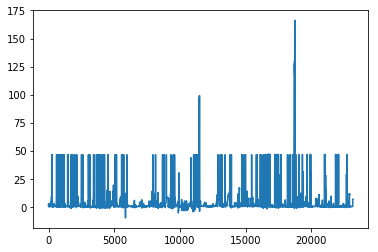

In [134]:
merge_final['24 Hour Snow (in)'].plot();

In [130]:
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23159 entries, 0 to 23158
Data columns (total 22 columns):
Date/Time (PST)                             23159 non-null datetime64[ns]
Battery Voltage (v)                         23159 non-null float64
Temperature (deg F)                         23159 non-null float64
Wind Speed Minimum (mph)                    23159 non-null float64
Wind Speed Average (mph)                    23159 non-null float64
Wind Speed Maximum (mph)                    23159 non-null float64
Wind Direction (deg.)                       23159 non-null float64
date                                        23159 non-null datetime64[ns]
24 Hour Snow (in)                           23159 non-null float64
Total Snow Depth (in)                       23159 non-null float64
area                                        23159 non-null object
danger_above_treeline                       23159 non-null float64
danger_below_treeline                       23159 non-null float64
danger_

In [123]:
mapper = DataFrameMapper([
    (['Temperature (deg F)', 
        'Wind Speed Average (mph)',
        'Wind Speed Maximum (mph)', 
        '24 Hour Snow (in)',
        'Total Snow Depth (in)',
        'max_24_hour_temp', 'min_24_hour_temp',
        'max_48_hour_temp', 'min_48_hour_temp',
        "mb - 3950' - Stevens Pass - Schmidt Haus",
        '4800ft_Brooks_precip'], ss)
    ])

In [135]:
X = merge_final[[
        'Battery Voltage (v)',
        'Temperature (deg F)',
        'Wind Speed Minimum (mph)', 
        'Wind Speed Average (mph)',
        'Wind Speed Maximum (mph)',
        'Wind Direction (deg.)',
        '24 Hour Snow (in)',
        'Total Snow Depth (in)',
        'max_24_hour_temp', 'min_24_hour_temp',
        'max_48_hour_temp', 'min_48_hour_temp',
        "mb - 3950' - Stevens Pass - Schmidt Haus",
        '4800ft_Brooks_precip'
]]

y = merge_final['danger_near_treeline']

In [136]:
X_train, X_test, y_train, y_test = X[:12553], X[12553:], y[:12553], y[12553:]

In [137]:
baseline_pred = np.mean(y_train)
residuals = (y_test - baseline_pred)
median_absolute_error = np.median(np.abs(residuals))
rmse=np.sqrt(np.mean(residuals**2))

print(median_absolute_error,rmse)

print(f'The MAE of just predicting the mean'
          f' is: {median_absolute_error}\n'
          f'The RMSE just predicting the mean'
          f' is: {rmse}\n'
      '==================================================================\n'
          '========================\n')

for regressor,name in zip(regressors,reg_names): #zip returns a tuple for each pair it is given
    pipe = Pipeline(steps=[
        ('scaler',mapper),
        ('regressor', regressor)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(f'The MAE of the {name}'
          f' is: {mean_absolute_error((y_test),preds)}\n'
          f'The RMSE of the {name}'
          f' is: {mean_squared_error((y_test),preds)}\n'
          '==================================================================\n'
          '========================\n'
         )
    


0.5439337210228632 0.849250390023001
The MAE of just predicting the mean is: 0.5439337210228632
The RMSE just predicting the mean is: 0.849250390023001

The MAE of the LinearRegression is: 0.717429780625789
The RMSE of the LinearRegression is: 1.3867638903056747

The MAE of the RandomForestRegressor is: 0.7477877311914262
The RMSE of the RandomForestRegressor is: 0.8632944621925902

The MAE of the GradientBoostingRegressor is: 0.683651084761369
The RMSE of the GradientBoostingRegressor is: 0.6625008611731812

The MAE of the KNeighborsRegressor is: 0.676051291721667
The RMSE of the KNeighborsRegressor is: 0.7844729398453706



/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


The MAE of the XGBRegressor is: 0.6821608839452256
The RMSE of the XGBRegressor is: 0.6612233179896038



/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/krex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


The MAE of the XGBRFRegressor is: 0.6868267470365557
The RMSE of the XGBRFRegressor is: 0.6334183761348877

